Batch reactor, multiple reactions

A -> B
A -> C

ODE system:
\begin{align*}
& d\left(\frac{Ca}{dt}\right) = -k_1 Ca - k_2 Ca\\
& d\left(\frac{Cb}{dt}\right) = k_1 Ca\\
& d\left(\frac{Cc}{dt}\right) = k_2 Ca
\end{align*}

where $k_2 = 1$, $C_a(t=0) = 1$, and final reaction time = 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.integrate import solve_ivp

plt.style.use('fivethirtyeight')

In [2]:
params = {
    'axes.labelsize': 'x-large',
    'ytick.labelsize': 'large',
    'xtick.labelsize': 'large'
}
plt.style.use('fivethirtyeight')
rcParams.update(params)

In [3]:
def ode_parallel(t, C, parameters):
    k1, k2 = parameters

    dCa_dt = -k1 * C[0] - k2*C[0]
    dCb_dt = k1 * C[0]
    dCc_dt = k2 * C[0]
    return [dCa_dt, dCb_dt, dCc_dt]

Let's solve the problem for two values of k1

In [4]:
k2 = 1
ca0 = 1        
tfin = 1       
k1s = [2, 4]
c0 = np.array([ca0, 0, 0])

In [5]:
solutions = []
for k1 in k1s:
    data = np.array([k1, k2])
    fun = lambda t, c: ode_parallel(t, c, data)

    solution = solve_ivp(fun, (0, tfin), c0, 
                         t_eval=np.linspace(0, tfin, 100))
    solutions.append(solution)
    

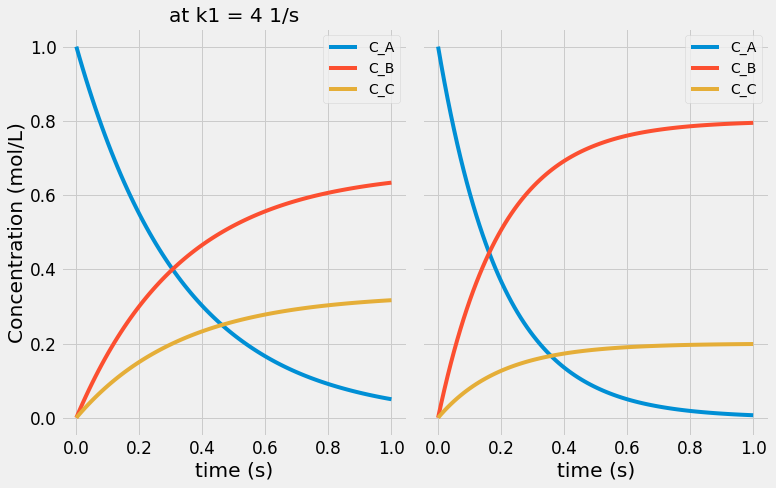

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(11, 7), sharey=True)

axes[0].plot(solutions[0].t, solutions[0].y.T)
axes[0].set_xlabel("time (s)")
axes[0].set_ylabel("Concentration (mol/L)")
axes[0].set_title('at k1 = %.0f 1/s' % k1s[0])

axes[1].plot(solutions[1].t, solutions[1].y.T)
axes[1].set_xlabel("time (s)")
axes[0].set_title('at k1 = %.0f 1/s' % k1s[1])

axes[0].legend(['C_A','C_B','C_C'])
axes[1].legend(['C_A','C_B','C_C'])


plt.tight_layout()
plt.show()